<a href="https://colab.research.google.com/github/AurelienGgt/Customer-Personality-Analysis/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import of data + library + Dependance (if needed)

## Access to google drive

In [ ]:
# Mount access to colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import library

In [ ]:
# Library
import pandas as pd

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# for random error
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

## Access of the data

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Customer Personality Analysis/exported_dataframe.csv') # We have a separator here,sep='\t'

## Fast visualisation


In [ ]:
df.head()

,Education,Marital_Status,Income,Age_of_user,Kids,marketing_purchase,Expenses,Total_purchase,duration_customer
0,Graduate,Single,58138.0,64,0,0,1617,25,849
1,Graduate,Single,46344.0,67,2,0,27,6,299
2,Graduate,In relationship,71613.0,56,0,0,776,21,498
3,Graduate,In relationship,26646.0,37,1,0,53,8,325
4,Post graduate,In relationship,58293.0,40,1,0,422,19,347


array([[<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Age_of_user'}>,
        <Axes: title={'center': 'Kids'}>],
       [<Axes: title={'center': 'marketing_purchase'}>,
        <Axes: title={'center': 'Expenses'}>,
        <Axes: title={'center': 'Total_purchase'}>],
       [<Axes: title={'center': 'duration_customer'}>, <Axes: >,
        <Axes: >]], dtype=object)

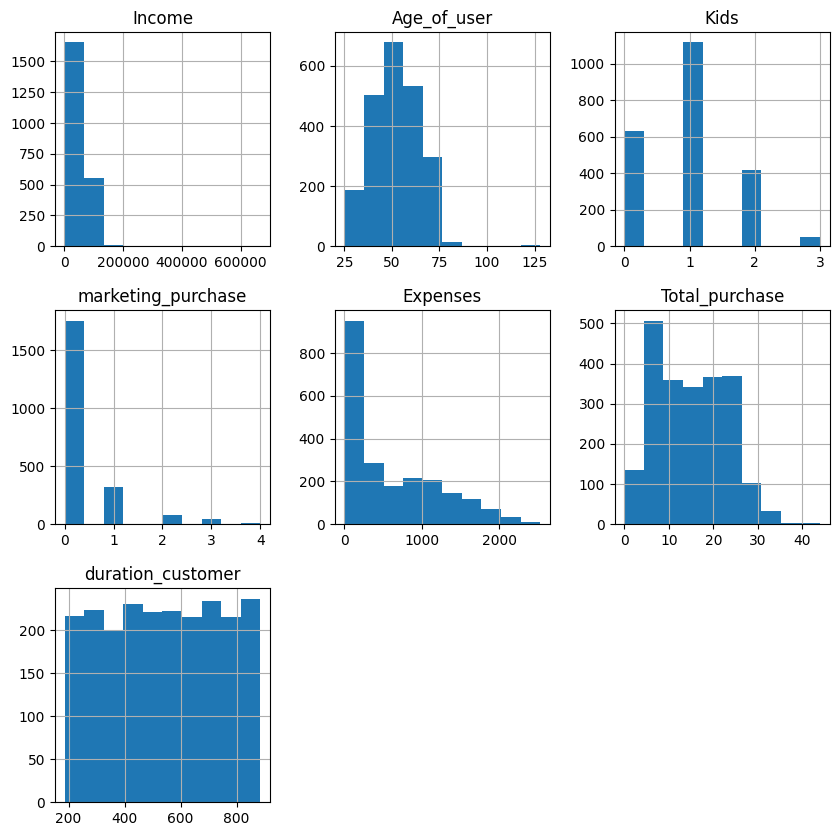

In [ ]:
df.hist(figsize=(10,10))

##

 # Clustering

## Import Library

In [ ]:
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder # changed to labelencoder
from sklearn.preprocessing import LabelEncoder

# Visualisation :
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer
OneHotEncoder

sklearn.preprocessing._encoders.OneHotEncoder

## Encoding the data

In [ ]:
df.head()

,Education,Marital_Status,Income,Age_of_user,Kids,marketing_purchase,Expenses,Total_purchase,duration_customer
0,Graduate,Single,58138.0,64,0,0,1617,25,849
1,Graduate,Single,46344.0,67,2,0,27,6,299
2,Graduate,In relationship,71613.0,56,0,0,776,21,498
3,Graduate,In relationship,26646.0,37,1,0,53,8,325
4,Post graduate,In relationship,58293.0,40,1,0,422,19,347


As first we will have to encode the column Education and the Column Marital status

### Label encoder for categorical column

In [ ]:
categorical_features = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        categorical_features.append(i) # add inside the list categorical_features

print(" The column with type Object are:",categorical_features)
label_encoding = LabelEncoder()
for i in categorical_features:
    df[i]=df[[i]].apply(label_encoding.fit_transform)

 The column with type Object are: ['Education', 'Marital_Status']


Instead of 3 columns for education and 2 for marital status I will merge the columns

In [ ]:
""" Removed this part and changed it for Label encoding
# for Education column :
df_encoded['Education_Encoded'] = 0
df_encoded.loc[df_encoded['Education_Graduate'] == 1, 'Education_Encoded'] = 1
df_encoded.loc[df_encoded['Education_No Degree'] == 1, 'Education_Encoded'] = 0
df_encoded.loc[df_encoded['Education_Post graduate'] == 1, 'Education_Encoded'] = 2

# for Marital column :
df_encoded['Marital_Status_Encoded'] = 0
df_encoded.loc[df_encoded['Marital_Status_In relationship'] == 1, 'Marital_Status_Encoded'] = 1
df_encoded.loc[df_encoded['Marital_Status_Single'] == 1, 'Marital_Status_Encoded'] = 0

to_drop = ['Education',
           'Marital_Status',
           'Education_Graduate',
           'Education_No Degree',
           'Education_Post graduate',
           'Marital_Status_In relationship',
           'Marital_Status_Single']
df_encoded = df_encoded.drop(to_drop, axis=1)
"""

" Removed this part and changed it for Label encoding\n# for Education column :\ndf_encoded['Education_Encoded'] = 0\ndf_encoded.loc[df_encoded['Education_Graduate'] == 1, 'Education_Encoded'] = 1\ndf_encoded.loc[df_encoded['Education_No Degree'] == 1, 'Education_Encoded'] = 0\ndf_encoded.loc[df_encoded['Education_Post graduate'] == 1, 'Education_Encoded'] = 2\n\n# for Marital column :\ndf_encoded['Marital_Status_Encoded'] = 0\ndf_encoded.loc[df_encoded['Marital_Status_In relationship'] == 1, 'Marital_Status_Encoded'] = 1\ndf_encoded.loc[df_encoded['Marital_Status_Single'] == 1, 'Marital_Status_Encoded'] = 0\n\nto_drop = ['Education',\n           'Marital_Status',\n           'Education_Graduate',\n           'Education_No Degree',\n           'Education_Post graduate',\n           'Marital_Status_In relationship',\n           'Marital_Status_Single']\ndf_encoded = df_encoded.drop(to_drop, axis=1)\n"

In [ ]:
df

,Education,Marital_Status,Income,Age_of_user,Kids,marketing_purchase,Expenses,Total_purchase,duration_customer
0,0,1,58138.0,64,0,0,1617,25,849
1,0,1,46344.0,67,2,0,27,6,299
2,0,0,71613.0,56,0,0,776,21,498
3,0,0,26646.0,37,1,0,53,8,325
4,2,0,58293.0,40,1,0,422,19,347
...,...,...,...,...,...,...,...,...,...
2211,0,0,61223.0,54,1,0,1341,18,567
2212,2,0,64014.0,75,3,1,444,22,205
2213,0,1,56981.0,40,0,1,1241,19,341
2214,2,0,69245.0,65,1,0,843,23,342


### Correlation between features

<Axes: >

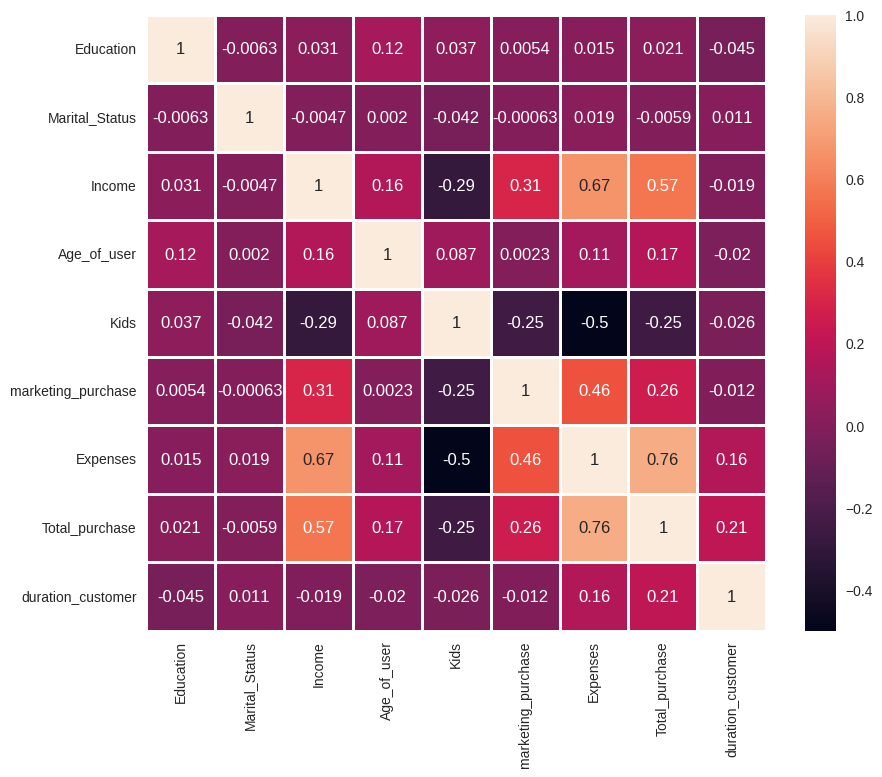

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, linewidths=1)

 __As expected, we can see :__

 - Expenses and total purchase are the highest correlation
 - Total purchase and income, Expenses are Marketing_purchase are highly correlate too
 - Expense and Kids are not correlate at all




## let's find the Cluster now :

### Scaler :

In [ ]:
df_encoded = df.copy() # Always made a copy before scaling

We have the choice between standardScaler(), MinMaxscaler() and robustScaler(), but for me here better to pick StandardScaler()

In [ ]:
scaled_features = StandardScaler().fit_transform(df_encoded.values)
df_scaler = pd.DataFrame(scaled_features, index=df_encoded.index, columns=df_encoded.columns)
df_scaler

,Education,Marital_Status,Income,Age_of_user,Kids,marketing_purchase,Expenses,Total_purchase,duration_customer
0,-0.941196,1.348829,0.234063,0.986443,-1.264803,-0.439265,1.675488,1.319446,1.529129
1,-0.941196,1.348829,-0.234559,1.236801,1.405806,-0.439265,-0.962358,-1.157987,-1.188411
2,-0.941196,-0.741384,0.769478,0.318822,-1.264803,-0.439265,0.280250,0.797881,-0.205155
3,-0.941196,-0.741384,-1.017239,-1.266777,0.070501,-0.439265,-0.919224,-0.897205,-1.059945
4,1.202371,-0.741384,0.240221,-1.016420,0.070501,-0.439265,-0.307044,0.537099,-0.951244
...,...,...,...,...,...,...,...,...,...
2211,-0.941196,-0.741384,0.356642,0.151917,0.070501,-0.439265,1.217598,0.406708,0.135772
2212,1.202371,-0.741384,0.467539,1.904422,2.741110,1.033369,-0.270546,0.928273,-1.652863
2213,-0.941196,1.348829,0.188091,-1.016420,-1.264803,1.033369,1.051696,0.537099,-0.980889
2214,1.202371,-0.741384,0.675388,1.069896,0.070501,-0.439265,0.391404,1.058664,-0.975948


### Elbow method :

Here we have the possibility to use  Sklearn for the visualisation but I prefer to use Yellowbrick who is in my sense, with a better visualisation

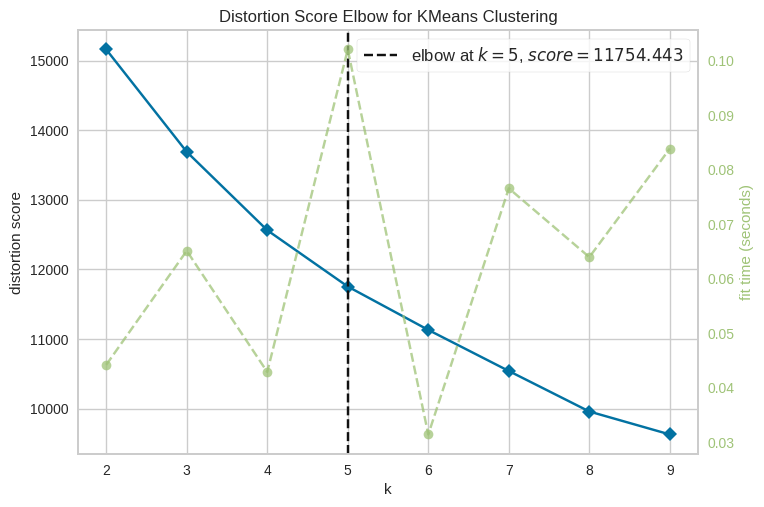

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(df_scaler)
visualizer.show()

### let's find the people inside the 5 groups now

In [ ]:
# Apply KMeans clustering with 5 clusters (elbow mode)
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(df_scaler)
df['cluster'] = kmeans.labels_

categories = df_scaler.columns.tolist()
N = len(categories)

for i in range(5):
    # Calculate the mean for each category
    cluster_data = df_scaler[df['cluster'] == i]
    cluster_means = cluster_data.mean().to_numpy()

    # Spider plot
    fig = go.Figure(data=[go.Scatterpolar(
        r=np.concatenate((cluster_means, [cluster_means[0]])),
        theta=categories + [categories[0]],
        fill='toself',
        name=f'Cluster {i}'
    )])

    fig.update_layout(
        polar=dict(
            radialaxis=dict(visible=True),
            angularaxis=dict(tickfont=dict(size=8))
        ),
        title=dict(text=f"Cluster {i}", x=0.5, y=0.95, font=dict(size=12)),
        showlegend=False
    )

    # Save
    file_path = f'/content/drive/My Drive/Customer Personality Analysis/cluster_{i}.html'
    fig.write_html(file_path)

    fig.show()

The spider plot is not visible in Github maybe change it to matplotlib or seaborn

Now with this spider we will analyse our cluster of customer.

In this part we will analyze the spider plot to explain the different groups

Cluster 0 :
-----------
- Peoples in this cluster has more than 1 kid
- Peoples in this cluster don't have a lot of Income and don't buy a lot of stuffs
- Peoples in this cluster are mostly graduate
- Peoples in this cluster are not really impacted by marketing offer and they are not customer will stay.
- Most people in this cluster are single.

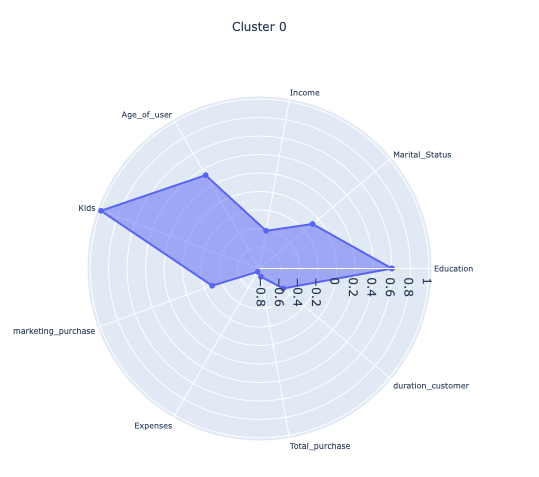

Cluster 1 :
-----------

- Most people in this cluster have kids
- Most people in this cluster are impacted by the marketing offer
- People in this cluster are customer will stay the most
- Most people in this cluster are in relationship
- People in this cluster are young and are mostly not graduate

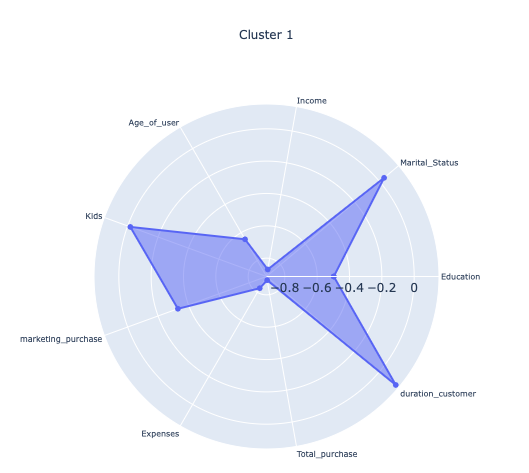

Cluster 2 :   
-----------

- People in this cluster have a lot of Income, spend a lot and buy a lot
- People in this cluster mostly don't have a kid
- People in this cluster are not young not old and they are not graduated
- People in this cluster are equal single or in relation ship

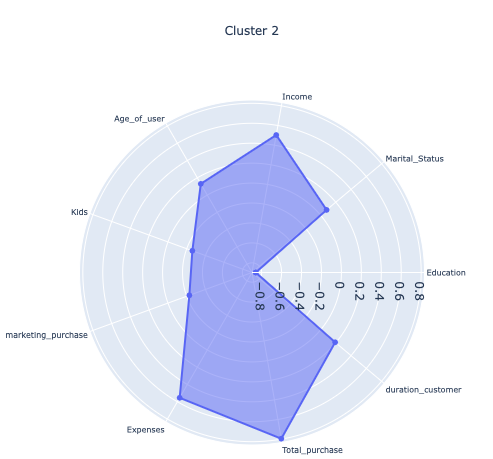

Cluster 3 :
-----------

People in this cluster are young, are not graduated and are mostly single
People in this cluster are here for the marketing campaign, spend a lot and buy some product.
People in this cluster are young customer for the company


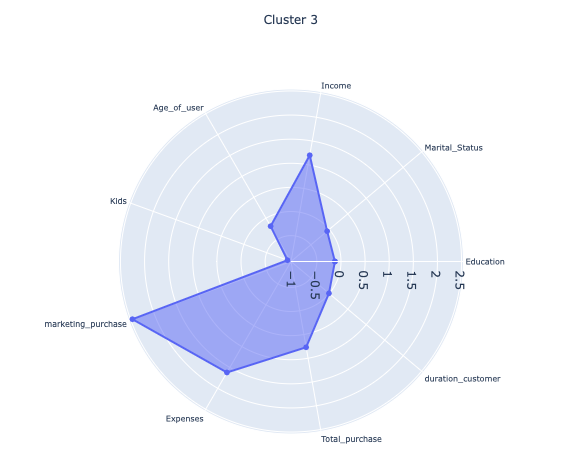

Cluster 4 :
-----------

People in this cluster are new customer, and they are from the marketing campaign
People in this cluster are young, have a good income, spend a lot and buy somne product
They are new customer and are mainly single and not graduate from school

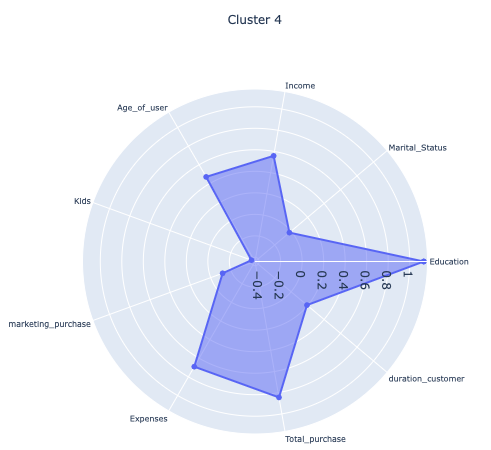

# Conclusion :

__If you want to focus about people who spend a lot you have to focus of :__

- Cluster 2
- Cluster 3
- Cluster 4

__If you want to focus on people who will stay :__

- Cluster 1
- Cluster 2

__If you want people who is impacted by the marketing campaign :__

- Cluster 1
- Cluster 3

__If you want people who purchase a lot of product :__

- Cluster 2
- Cluster 4

Mainly if I have to pick a cluster, in my opinion the best cluster to focus is the people in the cluster 2 and the cluster 3.

__Cluster 2 :__

This people spend a lot of money and it's people who are regular customer, and you don't need to make any marketing.

__Cluster 3 :__

They are people who spend a lot of money and they are impacted by the marketing campaign, so the objectives will be to make them from temporary customer to regular customer.
